In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os

In [2]:
df_orig = pd.read_csv(r"C:\Users\Pier\Documents\GitHub\Heart-Failure-ML\heart_failure_clinical_records_dataset.csv")

In [ ]:
df_orig.head()

In [5]:
props_binarias = ["anaemia","diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]
props_continuas = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium"] #NO TIENE TIME PORQ ES PARA LOS GRAFICOS

In [6]:
from sklearn.preprocessing import MinMaxScaler
df_normalized = df_orig.copy() #SI LA QUEREMOS LLAMAR USAR "df_normalized"
to_normalize = props_continuas+["time"]
x = df_normalized[to_normalize].values
x_scaled = MinMaxScaler().fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=to_normalize, index = df_normalized.index)
df_normalized[to_normalize] = df_temp

## DEJAMOS SOLO LAS FEATURES CON MAS CORRELACION 

In [8]:
df_normalized.drop(["anaemia","diabetes","high_blood_pressure","sex","smoking","creatinine_phosphokinase","platelets","time"],axis=1,inplace=True)

##TENGO LA DATA LIMPIA Y AHORA?

#### TODO ESTO ES UN RESUMEN GUIA, NO SON LOS DATASETS Q VAMOS A USAR

### SEPARO EN TEST Y TRAIN




In [9]:
from sklearn.model_selection import train_test_split

feat_train, feat_test, targ_train, targ_test = train_test_split(df_normalized.drop(["DEATH_EVENT"],axis=1),df_normalized["DEATH_EVENT"],test_size=0.2)

## REGRESION LINEAL

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

grado = 1

modelo = Pipeline([["poly",PolynomialFeatures(degree=grado,include_bias=True)],["regressor",LinearRegression(fit_intercept=False)]])

modelo.fit(feat_train,targ_train)


Pipeline(steps=[('poly', PolynomialFeatures(degree=1)),
                ['regressor', LinearRegression(fit_intercept=False)]])

In [ ]:
modelo["regressor"].coef_

In [59]:
from sklearn.metrics import mean_squared_error as mse

np.sqrt(mse(targ_test,modelo.predict(feat_test)))

0.3743389714724081

In [ ]:
from sklearn.model_selection import GridSearchCV

hyperparam = {"features__degree":[n for n in range(1,6)]}
#CUANDO HAGO GRILLA PONGO FEATURES
modelo = Pipeline([["features",PolynomialFeatures(degree=grado,include_bias=True)],["regressor",LinearRegression(fit_intercept=False)]])
grilla = GridSearchCV(modelo,hyperparam,refit=True,cv=len(feat_train),scoring="neg_mean_squared_error",verbose=True,n_jobs=-1)
grilla.fit(feat_train,targ_train)


In [ ]:
print(grilla.best_params_)

In [ ]:
for ni, i in enumerate(grilla.cv_results_['params']):
  print(i['features__degree'],-grilla.cv_results_['mean_test_score'][ni])
plt.errorbar(grilla.cv_results_['param_features__degree'].data,np.sqrt(-grilla.cv_results_['mean_test_score']),yerr=grilla.cv_results_['std_test_score'])
plt.yscale('log')
plt.xlabel('grado')
plt.ylabel('RMSE en validacion')

In [ ]:
besthyper_model = grilla.best_estimator_

np.sqrt(mse(targ_test,besthyper_model.predict(feat_test)))

# PRUEBA REGRESION LOGISTICA

In [11]:
from sklearn.linear_model import LogisticRegression

In [49]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

grado = 7

modelo = Pipeline([["poly",PolynomialFeatures(degree=grado,include_bias=True)],["regressor",LogisticRegression(fit_intercept=False, tol=0.0000001, penalty="l2")]])

modelo.fit(feat_train,targ_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=7)),
                ['regressor',
                 LogisticRegression(fit_intercept=False, tol=1e-07)]])

In [53]:
modelo.predict_proba(feat_test)

array([[0.86585646, 0.13414354],
       [0.53574719, 0.46425281],
       [0.90280205, 0.09719795],
       [0.90815845, 0.09184155],
       [0.79607595, 0.20392405],
       [0.87981418, 0.12018582],
       [0.8621211 , 0.1378789 ],
       [0.83090593, 0.16909407],
       [0.75277156, 0.24722844],
       [0.40224735, 0.59775265],
       [0.81692216, 0.18307784],
       [0.7908202 , 0.2091798 ],
       [0.72334315, 0.27665685],
       [0.88791421, 0.11208579],
       [0.83494462, 0.16505538],
       [0.61601922, 0.38398078],
       [0.80877475, 0.19122525],
       [0.8381788 , 0.1618212 ],
       [0.73090332, 0.26909668],
       [0.02682954, 0.97317046],
       [0.43359858, 0.56640142],
       [0.09764957, 0.90235043],
       [0.59272648, 0.40727352],
       [0.83665814, 0.16334186],
       [0.63619108, 0.36380892],
       [0.77517592, 0.22482408],
       [0.51003441, 0.48996559],
       [0.76978529, 0.23021471],
       [0.72337699, 0.27662301],
       [0.38059951, 0.61940049],
       [0.

In [25]:
modelo["regressor"].coef_

array([[ 9.46001265e-02,  3.75356205e-01, -1.52331760e+00,
         9.14540453e-01, -4.18628222e-01,  4.27026732e-01,
        -3.41187519e-01,  3.44996559e-01,  1.19134079e-01,
        -3.49951883e-01,  2.27529302e-01, -1.06873244e+00,
         1.78660751e-01,  5.95100476e-01, -3.86075090e-01,
         4.70766937e-01, -2.48138298e-02,  1.56880448e-01,
         1.79205277e-01, -2.43463725e-02,  7.36319411e-02,
        -1.98521243e-01,  5.74035610e-02,  2.26672315e-01,
         2.49265392e-02,  1.59103418e-01,  1.59750802e-01,
        -2.55457904e-01,  1.27027712e-01,  1.84542715e-01,
        -6.98122750e-01,  6.35900280e-02,  1.75609788e-01,
         4.34826872e-01, -1.87748215e-01,  4.55909769e-01,
         1.00980756e-01,  8.90777085e-02,  1.98006699e-01,
         3.63717872e-02,  2.07680417e-02, -1.12607014e-02,
         1.68086837e-02,  9.56690064e-02,  5.48715005e-02,
         1.07126639e-01,  3.80422210e-02,  1.11769196e-02,
         3.34352645e-02,  6.48194361e-02, -1.15686281e-0

In [32]:

from sklearn.metrics import accuracy_score

print(accuracy_score(targ_test, modelo.predict(feat_test)))

0.8166666666666667


In [34]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(targ_test, modelo.predict(feat_test))
print(cf)

[[40  3]
 [ 8  9]]


In [98]:
from sklearn.model_selection import GridSearchCV

hyperparam = {"poly__degree":[n for n in range(1,10)]}
#CUANDO HAGO GRILLA PONGO FEATURES
modelo = Pipeline([["poly",PolynomialFeatures(degree=grado,include_bias=True)],["regressor",LogisticRegression(fit_intercept=False, tol=0.00001, penalty="l2")]])
grilla = GridSearchCV(modelo,hyperparam,refit=True,cv=160,scoring="f1",verbose=True,n_jobs=-1)
grilla.fit(feat_train,targ_train)

Fitting 160 folds for each of 9 candidates, totalling 1440 fits


C:\Users\Pier\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 79 members, which is less than n_splits=160.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=160,
             estimator=Pipeline(steps=[['poly', PolynomialFeatures(degree=7)],
                                       ['regressor',
                                        LogisticRegression(fit_intercept=False,
                                                           tol=1e-05)]]),
             n_jobs=-1,
             param_grid={'poly__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='f1', verbose=True)

In [99]:
print(grilla.best_params_)

{'poly__degree': 7}


In [100]:
print(grilla.best_score_)

0.13958333333333334


0.8166666666666667


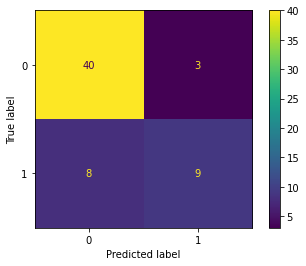

In [105]:
modelo = grilla.best_estimator_
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(accuracy_score(targ_test, modelo.predict(feat_test)))
cm = confusion_matrix(targ_test, modelo.predict(feat_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
#print(cf)

In [106]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve, roc_curve

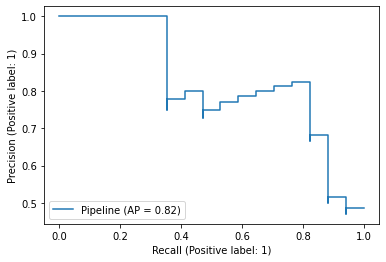

In [107]:
plot_precision_recall_curve(modelo, feat_test, targ_test)

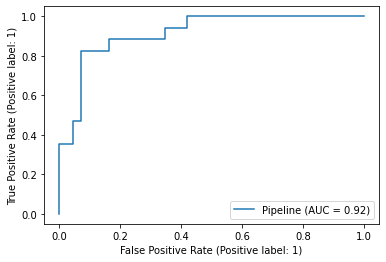

In [108]:
plot_roc_curve(modelo, feat_test, targ_test)